In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Reading data
data = pd.read_csv(r'C:\Users\dell\Downloads\insurance.csv')

# 1 Understanding the data

In [3]:
data.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [4]:
data.tail()

age     sex    bmi  children smoker     region     charges
1333   50    male  30.97         3     no  northwest  10600.5483
1334   18  female  31.92         0     no  northeast   2205.9808
1335   18  female  36.85         0     no  southeast   1629.8335
1336   21  female  25.80         0     no  southwest   2007.9450
1337   61  female  29.07         0    yes  northwest  29141.3603

In [5]:
data.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

In [6]:
data.shape

(1338, 7)

In [7]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [8]:
data.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [9]:
data['children'].unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

# CLEANING DATA

In [10]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
client = data.drop(['children'], axis=1)

In [12]:
client.head()

age     sex     bmi smoker     region      charges
0   19  female  27.900    yes  southwest  16884.92400
1   18    male  33.770     no  southeast   1725.55230
2   28    male  33.000     no  southeast   4449.46200
3   33    male  22.705     no  northwest  21984.47061
4   32    male  28.880     no  northwest   3866.85520

# RELATIONSHIP ANALYSIS

In [13]:
corelation = client.corr()

<AxesSubplot:>

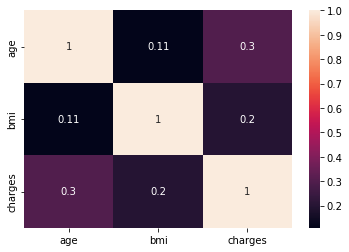

In [14]:
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, annot=True) 

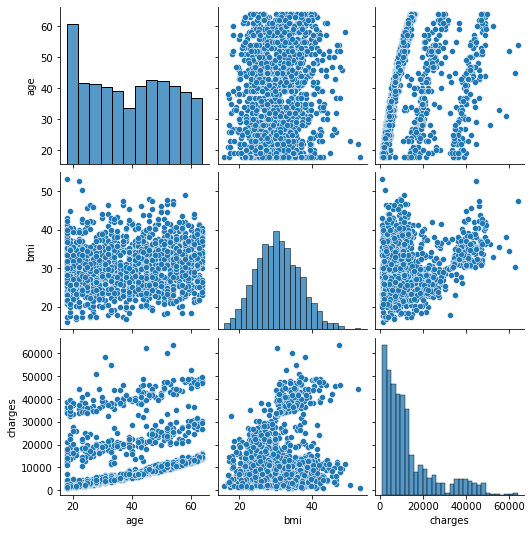

In [15]:
sns.pairplot(client)

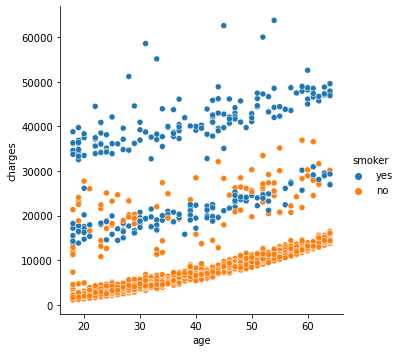

In [16]:
sns.relplot(x='age', y='charges', hue='smoker', data=client)

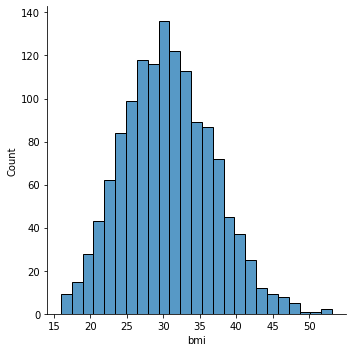

In [17]:
sns.displot(client['bmi'])

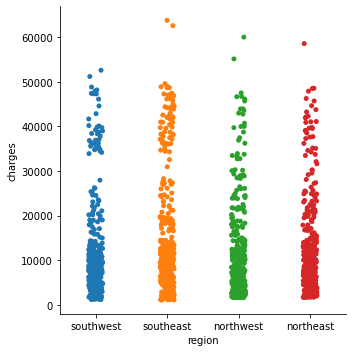

In [18]:
sns.catplot(x='region', y='charges', data=client)

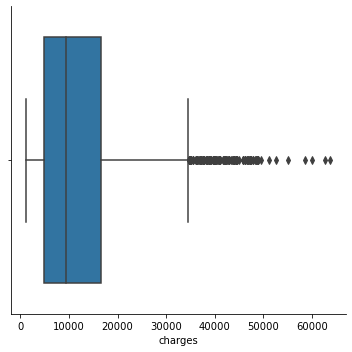

In [19]:
sns.catplot(x='charges',kind='box', data=client)

# 1 LINEAR REGRESSION


In [23]:
# collecting X and Y
X = client['age'].values
y = client['charges'].values

In [48]:
# Mean X and Y
mean_x = np.mean(X)
mean_y = np.mean(y)

# Total number of values
m = len(x)
#using formula to calculate b1 and b2
numer = 0
denominator = 0
for i in range(m):
    numer += (X[i] - mean_x) * (y[i] - mean_y)
    denominator += (X[i] - mean_x) ** 2
    b1 = numer / denominator
    b0 = mean_y - (b1 * mean_x)

# Print coefficients
print(b1, b0)

7945.7183643667895 -284909.33851611457


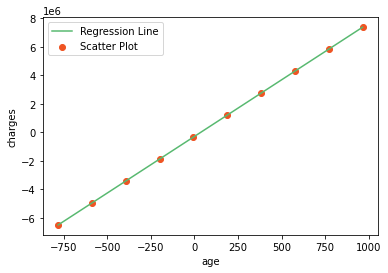

In [49]:
# Plotting values and regression line
max_x = np.max(x) + 100
min_x = np.min(x) - 100

# Calculating line values x and y
x = np.linspace(min_x, max_x, 10)
y = b0 + b1 * x

# Ploting line
plt.plot(x, y, color='#58b970', label='Regression Line')
# Ploting scatter points
plt.scatter(x, y, c='#ef5423', label='Scatter Plot')
plt.xlabel('age')
plt.ylabel('charges')
plt.legend()
plt.show()

In [50]:
# R-squared method:
ss_t = 0
ss_r = 0
for i in range(m):
    y_pred = b0 + b1 * X[i]
    ss_t += (y[i] - mean_y) ** 2
    ss_r += (y[i] - y_pred) ** 2
    r2 = 1 - (ss_r/ss_t)
print(r2)

0.0340284463097128
